# O que são séries temporais

## Importação e tratamento primário dos dados

In [40]:
CSV_URL_GLOBAL_LAND_TEMP = 'https://raw.githubusercontent.com/allanspadini/livro-val-allan/main/GlobalLandTemperaturesByCountry.csv'

In [41]:
import pandas as pd

df_land_temp = pd.read_csv(CSV_URL_GLOBAL_LAND_TEMP)

df_land_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [42]:
df_land_temp.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [43]:
df_land_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


* `dt`: Ano, mês e dia
* `AverageTemperature`: Temperatura média global do solo em graus celsius
* `AverageTemperatureUncertainty`: Incerteza dos valores de temperatura coletados
* `Country`: País

In [44]:
print('Data máxima', df_land_temp['dt'].max())
print('Data mínima', df_land_temp['dt'].min())

Data máxima 2013-09-01
Data mínima 1743-11-01


In [45]:
df_land_temp_br = df_land_temp.query('Country == "Brazil"')

df_land_temp_br.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
77110,1832-01-01,24.935,1.372,Brazil
77111,1832-02-01,24.505,1.953,Brazil
77112,1832-03-01,24.617,1.359,Brazil
77113,1832-04-01,23.990,2.013,Brazil
77114,1832-05-01,23.124,1.592,Brazil


In [46]:
df_land_temp_br.isnull().sum()

dt                                0
AverageTemperature               17
AverageTemperatureUncertainty    17
Country                           0
dtype: int64

In [47]:
df_land_temp_br.dropna(inplace=True)
df_land_temp_br.isnull().sum()

/tmp/ipykernel_513/2194867066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_land_temp_br.dropna(inplace=True)


dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [48]:
df_land_temp_br['AverageTemperature'].describe()

count    2164.000000
mean       24.699256
std         0.978787
min        21.797000
25%        24.022500
50%        24.829500
75%        25.449750
max        27.151000
Name: AverageTemperature, dtype: float64

## Visualização dos dados

<Axes: xlabel='dt', ylabel='AverageTemperature'>

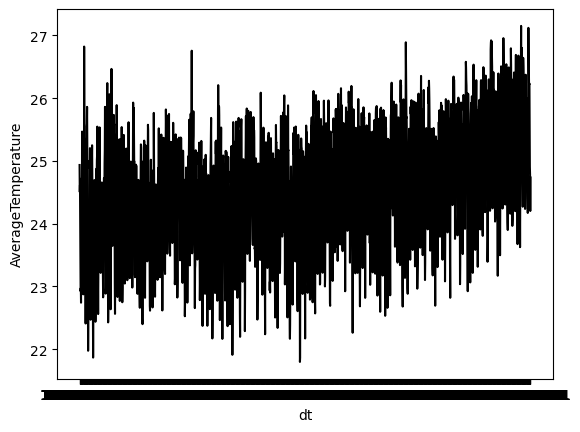

In [49]:
import seaborn as sns

sns.lineplot(df_land_temp_br,
             x='dt',
             y='AverageTemperature',
             color='black')

In [50]:
df_land_temp_br['dt'] = pd.to_datetime(df_land_temp_br['dt'],
                                       format='%Y-%m-%d')

df_land_temp_br.head()

/tmp/ipykernel_513/1414549144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_land_temp_br['dt'] = pd.to_datetime(df_land_temp_br['dt'],


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
77110,1832-01-01,24.935,1.372,Brazil
77111,1832-02-01,24.505,1.953,Brazil
77112,1832-03-01,24.617,1.359,Brazil
77113,1832-04-01,23.990,2.013,Brazil
77114,1832-05-01,23.124,1.592,Brazil


Text(0, 0.5, 'Temperatura em Graus Celsius')

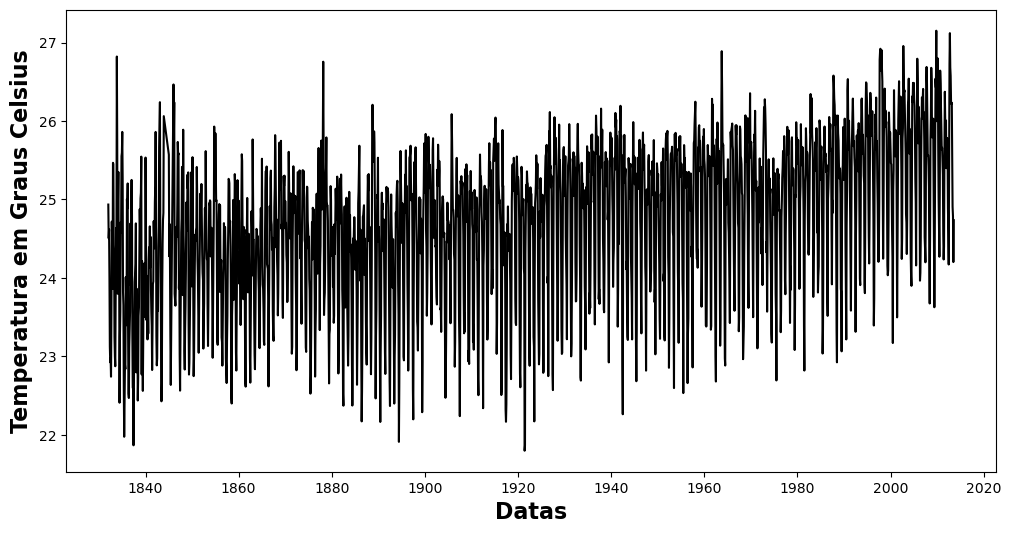

In [53]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.lineplot(df_land_temp_br,
                  x='dt',
                  y='AverageTemperature',
                  color='black')

ax.set_xlabel('Datas', 
              fontdict=dict(weight='bold',
                            size=16))
ax.set_ylabel('Temperatura em Graus Celsius', 
              fontdict=dict(weight='bold',
                            size=16))

In [54]:
df_land_temp_br['Month'] = df_land_temp_br['dt'].dt.month
df_land_temp_br.head()

/tmp/ipykernel_513/3819725567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_land_temp_br['Month'] = df_land_temp_br['dt'].dt.month


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Month
77110,1832-01-01,24.935,1.372,Brazil,1
77111,1832-02-01,24.505,1.953,Brazil,2
77112,1832-03-01,24.617,1.359,Brazil,3
77113,1832-04-01,23.990,2.013,Brazil,4
77114,1832-05-01,23.124,1.592,Brazil,5


Text(0, 0.5, 'Temperatura Média em Graus Celsius')

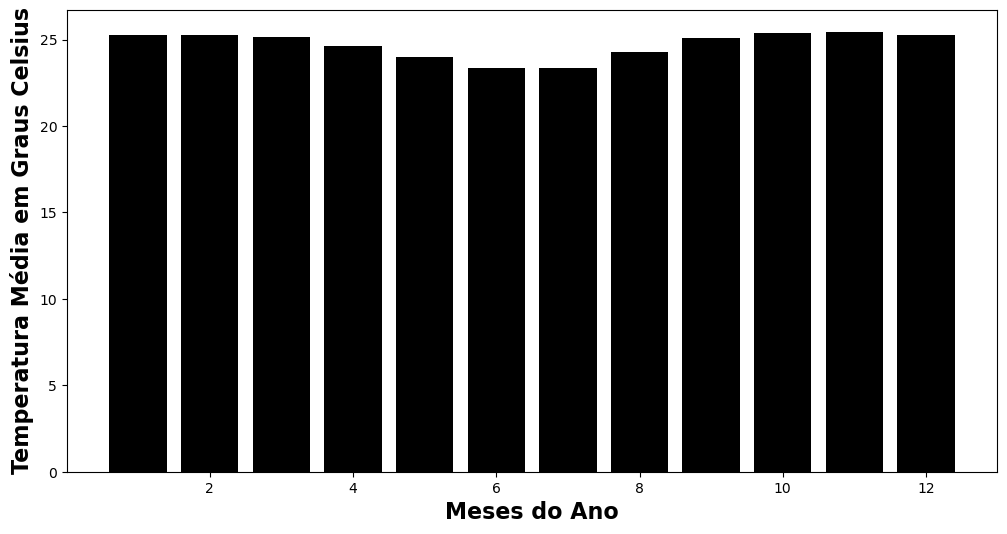

In [61]:
temperature = df_land_temp_br.groupby('Month')[['AverageTemperature']].mean()

fig, ax = plt.subplots(figsize=(12, 6))

ax = plt.bar(temperature.index,
             temperature['AverageTemperature'],
             color='k')

plt.xlabel('Meses do Ano',
           weight='bold',
           fontsize=16)

plt.ylabel('Temperatura Média em Graus Celsius',
           weight='bold',
           fontsize=16)

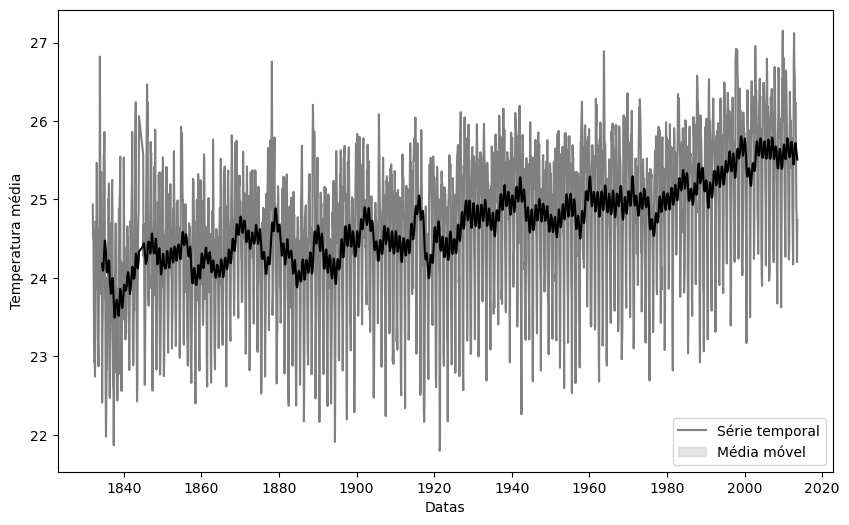

In [65]:
mm = df_land_temp_br['AverageTemperature'].rolling(30).mean()

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(df_land_temp_br, 
                  x='dt', 
                  y='AverageTemperature',
                  color='gray')

plt.xlabel('Datas')
plt.ylabel('Temperatura média')

sns.lineplot(df_land_temp_br, 
             x='dt',
             y=mm,
             color='black')

plt.legend(labels=['Série temporal','Média móvel'])

In [70]:
df_land_temp_br.to_csv('./data/processed/brazil_land_temp.csv', index=False)